In [9]:

import pandas as pd 
import os 
from datetime import datetime 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from scipy.stats import mannwhitneyu, normaltest
# import statsmodels.stats.multitest as sm
from scipy import stats
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test



In [2]:
# date = datetime.now().strftime("%Y%m%d")

# Get current directory
path = os.getcwd()
data_path = path + '/Data/'

pi = pd.read_excel(f'{data_path}/raw/LUAD Clinical Data.xlsx')

# Set path 
df = pd.read_csv(f"{data_path}/clustering/full_cd_clus_19_39_48.csv").rename(columns={'cluster': 'agglomerateto_275'}).rename(columns={'agglomerateto_39':'cluster'})
df_loc = pd.read_csv(f"{data_path}/celldata/celldata_20240506.csv")[['cellID', 'Location_Center_X', 'Location_Center_Y']].rename(columns={'cellID': 'source_ID'})

# Merge location data 
df_full= pd.merge(df, df_loc, on='source_ID', how='inner').rename(columns={'agglomerateto_39':'cluster'})


In [4]:
data = df[['Patient_ID', 'cluster']]
count_data = data.groupby(['Patient_ID', 'cluster']).size().reset_index(name='count')
total_clus = count_data.groupby(['Patient_ID'])['count'].sum().reset_index(name='total_clus')
count_df = pd.merge(count_data, total_clus, on=['Patient_ID'])

count_df['relative_frequency'] = (count_df['count'] / count_df['total_clus'])
count_df
# count_data

,Patient_ID,cluster,count,total_clus,relative_frequency
0,LUAD_D001,1,56,4517,0.012398
1,LUAD_D001,2,3,4517,0.000664
2,LUAD_D001,3,12,4517,0.002657
3,LUAD_D001,4,198,4517,0.043834
4,LUAD_D001,5,1378,4517,0.305070
...,...,...,...,...,...
12877,LUAD_D416,35,11,2879,0.003821
12878,LUAD_D416,36,7,2879,0.002431
12879,LUAD_D416,37,13,2879,0.004515
12880,LUAD_D416,38,10,2879,0.003473


In [5]:
pi.rename(columns={'Key':'Patient_ID', 'Survival or loss to follow-up (years)':'survival', 'Death (No: 0, Yes: 1)':'death'}, inplace=True)

df_full = pd.merge(count_df, pi, on='Patient_ID', how='inner')
df_full[df_full['cluster']==1]

,Patient_ID,cluster,count,total_clus,relative_frequency,"Sex (Male: 0, Female: 1)","Age (<75: 0, ≥75: 1)","BMI (<30: 0, ≥30: 1)","Smoking Status (Smoker: 0, Non-smoker:1)","Pack Years (1-30: 0, ≥30: 1)","Stage (I-II: 0, III-IV:1)","Progression (No: 0, Yes: 1)",death,survival,"Predominant histological pattern (Lepidic:1, Papillary: 2, Acinar: 3, Micropapillary: 4, Solid: 5)"
0,LUAD_D001,1,56,4517,0.012398,0,0,1,0.0,1.0,0.0,0.0,1,8.386,3
34,LUAD_D002,1,60,3121,0.019225,0,0,0,0.0,1.0,0.0,1.0,0,10.111,1
64,LUAD_D003,1,27,3338,0.008089,0,0,0,0.0,1.0,0.0,0.0,1,2.094,5
101,LUAD_D004,1,85,4237,0.020061,0,1,0,0.0,1.0,0.0,0.0,1,1.755,4
130,LUAD_D005,1,33,4300,0.007674,1,0,1,0.0,1.0,0.0,0.0,1,7.598,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12715,LUAD_D412,1,123,4522,0.027200,1,0,1,0.0,0.0,0.0,0.0,0,9.944,3
12747,LUAD_D413,1,202,4480,0.045089,1,0,0,0.0,0.0,0.0,0.0,0,8.132,1
12778,LUAD_D414,1,95,5561,0.017083,1,0,0,0.0,1.0,0.0,0.0,0,8.550,3
12812,LUAD_D415,1,125,2913,0.042911,1,0,0,0.0,1.0,0.0,0.0,1,1.862,3


In [43]:
relevant = df_full[['Patient_ID', 'cluster', 'survival', 'death', 'relative_frequency']]
relevant[relevant['Patient_ID'] == 'LUAD_D001']
# relevant

,Patient_ID,cluster,survival,death,relative_frequency
0,LUAD_D001,1,8.386,1,0.002657
1,LUAD_D001,2,8.386,1,0.000664
2,LUAD_D001,3,8.386,1,0.017932
3,LUAD_D001,4,8.386,1,0.043834
4,LUAD_D001,5,8.386,1,0.305070
5,LUAD_D001,6,8.386,1,0.008413
6,LUAD_D001,7,8.386,1,0.077706
7,LUAD_D001,8,8.386,1,0.015940
8,LUAD_D001,9,8.386,1,0.016604
9,LUAD_D001,11,8.386,1,0.012840


In [8]:
patients_with_neg_zscore

cluster,death,survival,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,zscore_c10
Patient_ID,,,,,,,,,,,,,,,,,,,,,
LUAD_D176,1,0.008,0.023581,0.003197,0.106315,0.007994,0.215428,0.026379,0.066747,0.047562,...,0.002398,0.000400,0.007594,0.000799,0.013189,0.000000,0.000000,0.009992,0.057554,-0.243021
LUAD_D275,1,0.008,0.020320,0.023651,0.051632,0.003997,0.094604,0.020986,0.006329,0.028314,...,0.025316,0.000333,0.014324,0.007328,0.007328,0.000666,0.001999,0.004664,0.029980,-0.243021
LUAD_D284,0,0.025,0.003315,0.010850,0.002712,0.022303,0.094937,0.015371,0.055756,0.028933,...,0.000904,0.000000,0.013562,0.002110,0.001206,0.000301,0.000301,0.003315,0.011151,-0.168264
LUAD_D008,1,0.066,0.008954,0.003070,0.004093,0.029675,0.068048,0.029931,0.007675,0.009977,...,0.000767,0.000000,0.006140,0.000512,0.000767,0.001791,0.000512,0.000512,0.007675,-0.243021
LUAD_D124,1,0.085,0.035509,0.008877,0.015835,0.056862,0.092850,0.216171,0.013676,0.015115,...,0.005038,0.000000,0.005278,0.000000,0.001919,0.001679,0.000000,0.001679,0.004798,-0.243021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LUAD_D180,0,17.583,0.009793,0.000228,0.010931,0.030289,0.098383,0.005466,0.227966,0.004783,...,0.000000,0.000000,0.017991,0.000455,0.000455,0.000228,0.000228,0.003416,0.025279,-0.243021
LUAD_D243,0,18.245,0.024139,0.006538,0.023887,0.023384,0.071159,0.052804,0.038220,0.057078,...,0.006286,0.000000,0.025899,0.001257,0.006538,0.000251,0.000000,0.000754,0.048278,-0.243021
LUAD_D388,0,18.552,0.014850,0.003564,0.010692,0.039798,0.196614,0.021978,0.009801,0.016335,...,0.000891,0.000297,0.021978,0.004158,0.002376,0.000594,0.000297,0.002079,0.028215,-0.243021


Amount of people with 0 prevalence exactly: 0


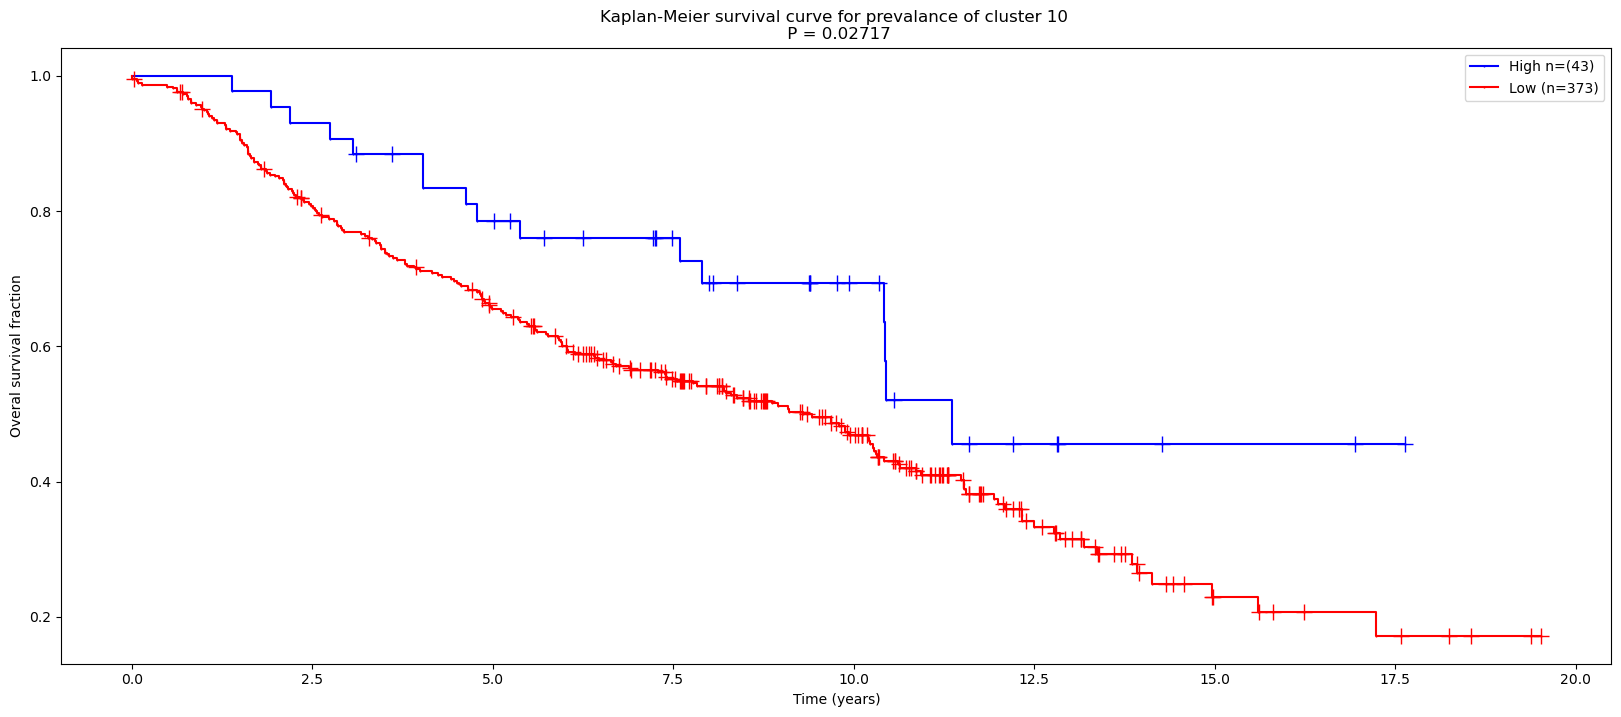

In [11]:

# kaplan meijer plot accoring to Sorin

# Insert cluster for which kaplan meijer needs to be divided
vip_cluster = 10

patients_km = df_full.pivot(columns='cluster', index=['Patient_ID', 'survival', 'death'], values='relative_frequency')
patients_km.fillna(0, inplace=True)

# Calculate the z-score for the 'agglomerateto40' column
patients_km[f'zscore_c{vip_cluster}'] = stats.zscore(patients_km[[vip_cluster]])
patients_km.reset_index('survival', inplace=True)

# Sort the DataFrame by survival years in ascending order
df_sorted_km = patients_km.sort_values(by='survival')

# Filter the dataframe for patients with a z-score of 0 or higher
patients_with_neg_zscore = df_sorted_km[df_sorted_km[f'zscore_c{vip_cluster}'] < 0].reset_index('death')
patients_with_pos_zscore = df_sorted_km[df_sorted_km[f'zscore_c{vip_cluster}'] > 0].reset_index('death')

print("Amount of people with 0 prevalence exactly:",len(df_sorted_km[df_sorted_km[f'zscore_c{vip_cluster}'] == 0]))

# Log rank test 
p_val = logrank_test(patients_with_pos_zscore['survival'], patients_with_neg_zscore['survival'], event_observed_A=patients_with_pos_zscore['death'], event_observed_B=patients_with_neg_zscore['death']).p_value

# --------
# Create a KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier curve to your data
kmf.fit(durations=patients_with_pos_zscore['survival'], event_observed=patients_with_pos_zscore['death'])

# Plot the first curve
plt.figure(figsize=(20, 8))
kmf.plot(label=f'High n=({len(patients_with_pos_zscore)})', color='blue', ci_show=False, show_censors=True, marker='|', markersize=1)


kmf.fit(durations=patients_with_neg_zscore['survival'], event_observed=patients_with_neg_zscore['death'])
kmf.plot(label=f'Low (n={len(patients_with_neg_zscore)})', color='red', ci_show=False, show_censors=True, marker='|', markersize=1)

# Plot the Kaplan-Meier curve
# kmf.plot_survival_function()
plt.title(f'Kaplan-Meier survival curve for prevalance of cluster {vip_cluster} \n P = {round(p_val, 5)}')
plt.xlabel('Time (years)')
plt.ylabel('Overal survival fraction')
plt.show()

Amount of people with 0 prevalence exactly: 0


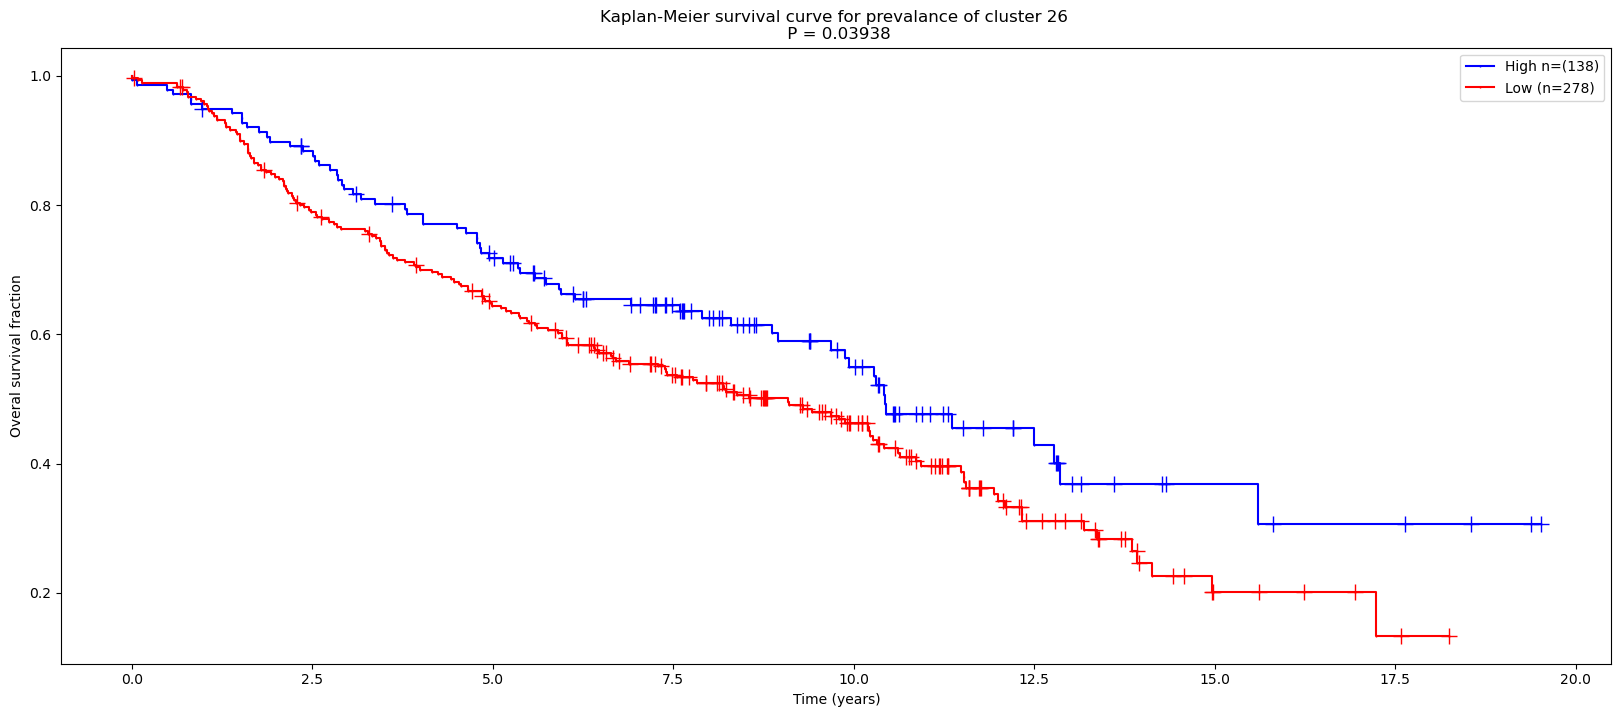

In [12]:

# kaplan meijer plot accoring to Sorin

# Insert cluster for which kaplan meijer needs to be divided
vip_cluster = 26

patients_km = df_full.pivot(columns='cluster', index=['Patient_ID', 'survival', 'death'], values='relative_frequency')
patients_km.fillna(0, inplace=True)

# Calculate the z-score for the 'agglomerateto40' column
patients_km[f'zscore_c{vip_cluster}'] = stats.zscore(patients_km[[vip_cluster]])
patients_km.reset_index('survival', inplace=True)

# Sort the DataFrame by survival years in ascending order
df_sorted_km = patients_km.sort_values(by='survival')

# Filter the dataframe for patients with a z-score of 0 or higher
patients_with_neg_zscore = df_sorted_km[df_sorted_km[f'zscore_c{vip_cluster}'] < 0].reset_index('death')
patients_with_pos_zscore = df_sorted_km[df_sorted_km[f'zscore_c{vip_cluster}'] > 0].reset_index('death')

print("Amount of people with 0 prevalence exactly:",len(df_sorted_km[df_sorted_km[f'zscore_c{vip_cluster}'] == 0]))

# Log rank test 
p_val = logrank_test(patients_with_pos_zscore['survival'], patients_with_neg_zscore['survival'], event_observed_A=patients_with_pos_zscore['death'], event_observed_B=patients_with_neg_zscore['death']).p_value

# --------
# Create a KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier curve to your data
kmf.fit(durations=patients_with_pos_zscore['survival'], event_observed=patients_with_pos_zscore['death'])

# Plot the first curve
plt.figure(figsize=(20, 8))
kmf.plot(label=f'High n=({len(patients_with_pos_zscore)})', color='blue', ci_show=False, show_censors=True, marker='|', markersize=1)


kmf.fit(durations=patients_with_neg_zscore['survival'], event_observed=patients_with_neg_zscore['death'])
kmf.plot(label=f'Low (n={len(patients_with_neg_zscore)})', color='red', ci_show=False, show_censors=True, marker='|', markersize=1)

# Plot the Kaplan-Meier curve
# kmf.plot_survival_function()

plt.title(f'Kaplan-Meier survival curve for prevalance of cluster {vip_cluster} \n P = {round(p_val, 5)}')
plt.xlabel('Time (years)')
plt.ylabel('Overal survival fraction')
plt.show()

In [ ]:

# kaplan meijer plot accoring to Sorin

# Insert cluster for which kaplan meijer needs to be divided
vip_cluster = 26

patients_km = df_full.pivot(columns='cluster', index=['Patient_ID', 'survival', 'death'], values='relative_frequency')
patients_km.fillna(0, inplace=True)

# Calculate the z-score for the 'agglomerateto40' column
patients_km[f'zscore_c{vip_cluster}'] = stats.zscore(patients_km[[vip_cluster]])
patients_km.reset_index('survival', inplace=True)

# Sort the DataFrame by survival years in ascending order
df_sorted_km = patients_km.sort_values(by='survival')

# Filter the dataframe for patients with a z-score of 0 or higher
patients_with_neg_zscore = df_sorted_km[df_sorted_km[f'zscore_c{vip_cluster}'] < 0].reset_index('death')
patients_with_pos_zscore = df_sorted_km[df_sorted_km[f'zscore_c{vip_cluster}'] > 0].reset_index('death')

print("Amount of people with 0 prevalence exactly:",len(df_sorted_km[df_sorted_km[f'zscore_c{vip_cluster}'] == 0]))

# Log rank test 
p_val = logrank_test(patients_with_pos_zscore['survival'], patients_with_neg_zscore['survival'], event_observed_A=patients_with_pos_zscore['death'], event_observed_B=patients_with_neg_zscore['death']).p_value

# --------
# Create a KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier curve to your data
kmf.fit(durations=patients_with_pos_zscore['survival'], event_observed=patients_with_pos_zscore['death'])

# Plot the first curve
plt.figure(figsize=(20, 8))
kmf.plot(label=f'High n=({len(patients_with_pos_zscore)})', color='blue', ci_show=False, show_censors=True, marker='|', markersize=1)


kmf.fit(durations=patients_with_neg_zscore['survival'], event_observed=patients_with_neg_zscore['death'])
kmf.plot(label=f'Low (n={len(patients_with_neg_zscore)})', color='red', ci_show=False, show_censors=True, marker='|', markersize=1)

# Plot the Kaplan-Meier curve
# kmf.plot_survival_function()
plt.title(f'Kaplan-Meier survival curve for prevalance of cluster {vip_cluster} \n P = {round(p_val, 5)}')


In [38]:
ax[7][2]

<Axes: >

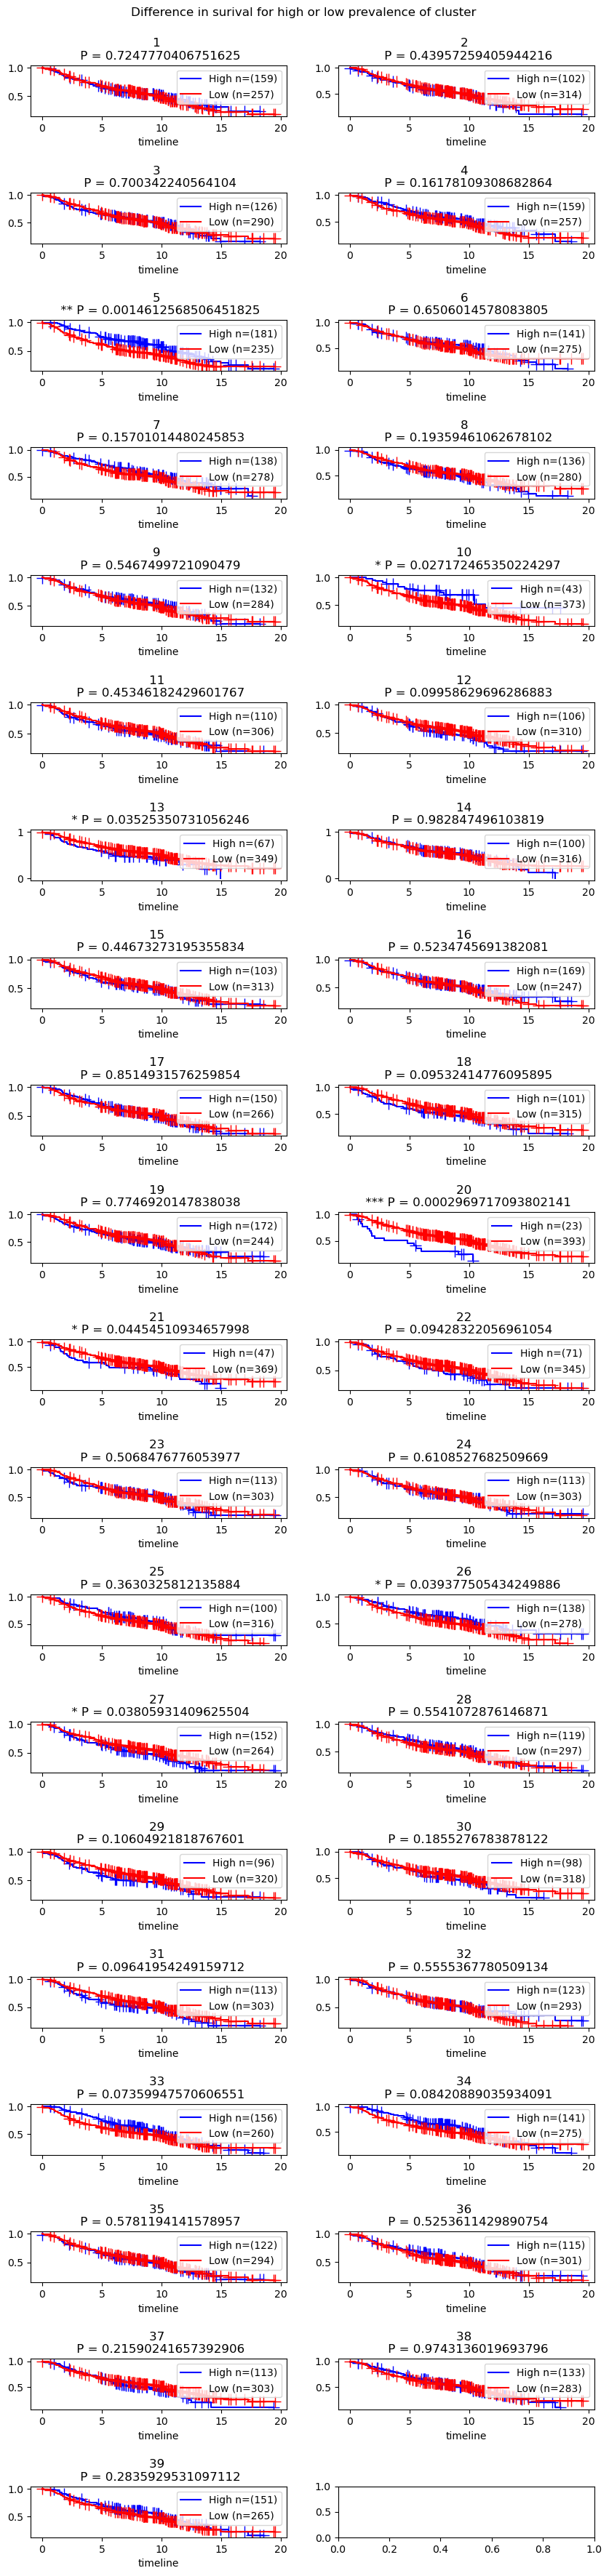

In [71]:
# Create subplots
fig, ax = plt.subplots(20, 2, figsize=(10, 40))
plt.subplots_adjust(hspace=1.5)  # Adjust vertical space between subplots


for vip_cluster in range(1, df_full['cluster'].max() + 1):


    patients_km = df_full.pivot(columns='cluster', index=['Patient_ID', 'survival', 'death'], values='relative_frequency')
    patients_km.fillna(0, inplace=True)

    # Calculate the z-score for the 'agglomerateto40' column
    patients_km[f'zscore_c{vip_cluster}'] = stats.zscore(patients_km[[vip_cluster]])
    patients_km.reset_index('survival', inplace=True)

    # Sort the DataFrame by survival years in ascending order
    df_sorted_km = patients_km.sort_values(by='survival')

    # Filter the dataframe for patients with a z-score of 0 or higher
    patients_with_neg_zscore = df_sorted_km[df_sorted_km[f'zscore_c{vip_cluster}'] < 0].reset_index('death')
    patients_with_pos_zscore = df_sorted_km[df_sorted_km[f'zscore_c{vip_cluster}'] > 0].reset_index('death')

    p_val = logrank_test(patients_with_pos_zscore['survival'], patients_with_neg_zscore['survival'], event_observed_A=patients_with_pos_zscore['death'], event_observed_B=patients_with_neg_zscore['death']).p_value

    # Create a KaplanMeierFitter object
    kmf = KaplanMeierFitter()

    # Fit the Kaplan-Meier curve to your data
    kmf.fit(durations=patients_with_pos_zscore['survival'], event_observed=patients_with_pos_zscore['death'])
    # Plot the first curve
    kmf.plot(label=f'High n=({len(patients_with_pos_zscore)})', color='blue', ci_show=False, show_censors=True, marker='|', markersize=0.1, ax=ax[(vip_cluster - 1)//2][(vip_cluster - 1)%2])

    kmf.fit(durations=patients_with_neg_zscore['survival'], event_observed=patients_with_neg_zscore['death'])
    kmf.plot(label=f'Low (n={len(patients_with_neg_zscore)})', color='red', ci_show=False, show_censors=True, marker='|', markersize=0.1, ax=ax[(vip_cluster - 1)//2][(vip_cluster - 1)%2])
    
    if p_val < 0.001:
        ax[(vip_cluster - 1)//2][(vip_cluster - 1)%2].set_title(f'{vip_cluster} \n *** P = {p_val}')
    elif p_val < 0.01:
        ax[(vip_cluster - 1)//2][(vip_cluster - 1)%2].set_title(f'{vip_cluster} \n ** P = {p_val}')
    elif p_val < 0.05:
        ax[(vip_cluster - 1)//2][(vip_cluster - 1)%2].set_title(f'{vip_cluster} \n * P = {p_val}')
    else:
        ax[(vip_cluster - 1)//2][(vip_cluster - 1)%2].set_title(f'{vip_cluster} \n P = {p_val}')


    

fig.suptitle(f'Difference in surival for high or low prevalence of cluster')
plt.subplots_adjust(top=0.96)  # Adjust the top to make room for the title

plt.show()
    # print(vip_cluster, (vip_cluster - 1)//4,(vip_cluster - 1)% )
    # kmf.plot()
    # ax[(vip_cluster - 1)//4][(vip_cluster - 1)%4].set_title(f'Differenc in surival for high or low prevalence of cluster {vip_cluster}')
    # plt.legend(None)



